In [33]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [34]:
#grab data set
titanic = sns.load_dataset('titanic')

#exclude unnecessary collumns
titanic = titanic.drop(['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis=1)

#fill in missing entries
titanic['age'].fillna(titanic.groupby('pclass')['age'].transform("median"), inplace=True)

#drop unnecessary rows
titanic.dropna(inplace=True)

#convert variables values into true/false values
new_sex = pd.get_dummies(titanic['sex'], drop_first=True)

new_embarked = pd.get_dummies(titanic['embarked'], drop_first=True)

#add converted variables into dataframe
titanic = pd.concat([titanic, new_sex, new_embarked], axis=1)

#drop og values
titanic.drop(['sex', 'embarked'],axis=1, inplace=True)

#show demo of variables
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
from sklearn.model_selection import train_test_split

# X is all possible features/independent variables , Y what we are modeling 

X = titanic.drop('survived', axis=1) 
Y = titanic['survived']

#split the data into the training set and set state seed for consistency
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.3, random_state = 1000)

#print the results
trainX.shape, trainY.shape, testX.shape, testY.shape

((622, 8), (622,), (267, 8), (267,))

In [36]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#importing library for logistic regression from the above link
from sklearn.linear_model import LogisticRegression

# the C parameter is for avoiding overfitting using penalty terms
# DEBUG: this produces a warning, to be ignored for now
logreg = LogisticRegression(C=1e10)

# fit the model with data
fit = logreg.fit(trainX, trainY)

C:\Users\emmaw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Question 1: generate the optimal cut off value

#for each possible cutoff value between 0 and 1 by increments of 0.01
for i in range(1, 100, 1):
    cutoffval = i/100
    
    # make predictions array for each row, either a 0 for death or 1 for survival
    prob_of_1 = (logreg.predict_proba(trainX)[:,1] >= cutoffval).astype(bool)
    
    # find accuracy by dividing the number of correct predictions by the total number of records
    print("Accuracy for cutoff of:", cutoffval, "\n", np.sum(trainY == prob_of_1)/622, "\n")

Accuracy for cutoff of: 0.01 
 0.3842443729903537 

Accuracy for cutoff of: 0.02 
 0.3858520900321543 

Accuracy for cutoff of: 0.03 
 0.3971061093247588 

Accuracy for cutoff of: 0.04 
 0.40836012861736337 

Accuracy for cutoff of: 0.05 
 0.4292604501607717 

Accuracy for cutoff of: 0.06 
 0.4533762057877814 

Accuracy for cutoff of: 0.07 
 0.48231511254019294 

Accuracy for cutoff of: 0.08 
 0.5032154340836013 

Accuracy for cutoff of: 0.09 
 0.5257234726688103 

Accuracy for cutoff of: 0.1 
 0.5996784565916399 

Accuracy for cutoff of: 0.11 
 0.6254019292604501 

Accuracy for cutoff of: 0.12 
 0.6511254019292605 

Accuracy for cutoff of: 0.13 
 0.6832797427652733 

Accuracy for cutoff of: 0.14 
 0.6945337620578779 

Accuracy for cutoff of: 0.15 
 0.6961414790996785 

Accuracy for cutoff of: 0.16 
 0.702572347266881 

Accuracy for cutoff of: 0.17 
 0.7009646302250804 

Accuracy for cutoff of: 0.18 
 0.707395498392283 

Accuracy for cutoff of: 0.19 
 0.7315112540192926 

Accuracy for 

In [70]:
#Question 2: use cutoff value from previous question to test the effectivness of the model with a confusion matrix

# prints the default cutoff accuracy
print("Default accuracy with a cutoff value of 0.5: ", fit.score(testX, testY))

# custom cutoff accuracy using the results from the question above
prob_of_1 = (logreg.predict_proba(testX)[:,1] >= 0.61).astype(bool)
print("Accuracy for cutoff of 0.61: ", np.sum(testY == prob_of_1)/267, "\n")

# custom cutoff confusion matrix
metrics.confusion_matrix(testY, prob_of_1)

#default cutoff confusion matrix
metrics.confusion_matrix(testY, fit.predict(testX))
#the default cutoff has more false positives and less false negatives as observed from the results

Default accuracy with a cutoff value of 0.5:  0.7790262172284644
Accuracy for cutoff of 0.61:  0.7902621722846442 



array([[138,  24],
       [ 35,  70]], dtype=int64)

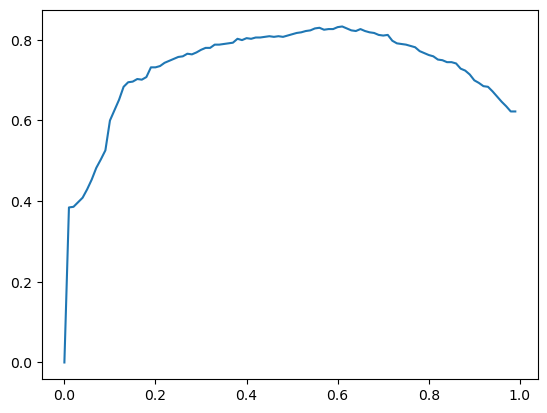

In [94]:
#extra credit: roc curve based on the 100 different cutoffs

prob_Array = np.array([0])
testYArray = np.array([0.0])

#for each possible cutoff value between 0 and 1 by increments of 0.01
for i in range(1, 100, 1):
    cutoffval = i/100
    
    # make predictions array for each row, either a 0 for death or 1 for survival
    prob_of_1 = (logreg.predict_proba(trainX)[:,1] >= cutoffval).astype(bool)
    
    # find accuracy by dividing the number of correct predictions by the total number of records
    prob = np.sum(trainY == prob_of_1)/622
    prob_Array = np.append(prob_Array, prob)
    testYArray = np.append(testYArray, cutoffval)


# plot the rates
plt.plot(testYArray, prob_Array)
